In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Social_Network_ads.csv")

In [3]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [4]:
dataset.columns

Index([u'User ID', u'Gender', u'Age', u'EstimatedSalary', u'Purchased'], dtype='object')

In [27]:
x=dataset[['Age','EstimatedSalary']].values
y=dataset['Purchased'].values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [30]:
#from sklearn.linear_model import LinearRegression as lr

In [31]:
#linear_regressor=lr()

In [32]:
#linear_regressor.fit(x_train,y_train)

In [33]:
import matplotlib.pyplot as plt

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
print(x_train)
print(x_test)

[[-0.12956725 -0.51591403]
 [ 0.62887519 -1.38089658]
 [-0.22437256 -0.51591403]
 [-0.31917786 -0.31408477]
 [-1.74125744  0.34906851]
 [-0.31917786 -1.35206382]
 [-0.41398317 -1.29439832]
 [ 0.06004336  0.08957375]
 [ 2.05095477 -0.80424155]
 [ 0.91329111  0.75272703]
 [-0.88800969  0.29140301]
 [-1.36203622 -1.09256906]
 [-1.26723091  0.57973052]
 [ 0.15484867  2.0790336 ]
 [-1.17242561 -0.51591403]
 [ 0.34445928  0.26257026]
 [ 0.91329111 -1.00607081]
 [ 1.29251233  1.96370259]
 [ 0.34445928  0.14723925]
 [-0.12956725 -0.48708128]
 [-0.69839908 -0.11225551]
 [-1.17242561  0.29140301]
 [-1.17242561 -1.58272584]
 [ 1.29251233  2.30969561]
 [-0.50878847 -0.54474678]
 [ 2.05095477 -0.68891054]
 [-0.22437256  0.83922529]
 [ 0.15484867  1.0698873 ]
 [-0.31917786  0.14723925]
 [-0.79320439  0.55089777]
 [-1.17242561  0.46439952]
 [-0.31917786  2.22319735]
 [ 0.06004336  0.03190824]
 [-0.03476195 -0.31408477]
 [ 1.29251233  0.57973052]
 [ 1.00809641  0.46439952]
 [-0.982815   -1.09256906]
 

In [40]:
#fitting logistic regression to the training set
#from sklearn.linear_model import LogisticRegression
#classifier=LogisticRegression(random_state=0)
#classifier.fit(x_train,y_train)

In [48]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [49]:
#fitting k-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=4)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [50]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [51]:
import numpy as np
error_rate=[]
#will take some time
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [52]:
print(error_rate)

[0.15, 0.16, 0.1, 0.13, 0.12, 0.1, 0.1, 0.1, 0.1, 0.09, 0.1, 0.09, 0.1, 0.1, 0.09, 0.1, 0.1, 0.1, 0.11, 0.09, 0.09, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]


Text(0,0.5,'error rate')

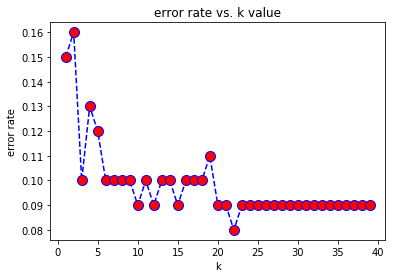

In [54]:
plt.figure()
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='r',markersize=10)
plt.title('error rate vs. k value')
plt.xlabel('k')
plt.ylabel('error rate')

In [ ]:
#fittinng SVM to the training set
#from sklearn.svm import SVC
#classifier=SVC(kernel='linear',random_state=0)
#classifier=SVC(kernel='poly',degree=5,random_state=0)
#classifier.fit(x_train,y_train)